# Exploratory Analysis - 3

#### This analysis is to explore if there is a trend in wins registered by Racers.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np

In [2]:
#Load files for analysis
results_df = pd.read_csv('../Resources/Dataset/results.csv')
circuits_df = pd.read_csv('../Resources/Dataset/circuits.csv')
constructor_results_df = pd.read_csv('../Resources/Dataset/constructor_results.csv')
constructors_df = pd.read_csv('../Resources/Dataset/constructors.csv')
drivers_df = pd.read_csv('../Resources/Dataset/drivers.csv')
races_df = pd.read_csv('../Resources/Dataset/races.csv')
status_df = pd.read_csv('../Resources/Dataset/status.csv')

### Merging datasets

In [3]:
# Joining datasets

#join results with drivers datasets
res_dr_df = pd.merge(results_df,drivers_df,how='left',on='driverId', suffixes=('_res','_drv'))

#join status dataset
res_dr_df_st = pd.merge(res_dr_df, status_df, how='left', on='statusId', suffixes=('_mer1', 'st'))

#join races with results
res_dr_ra_df = pd.merge(res_dr_df_st,races_df,how='left',on='raceId', suffixes=('_mer2','_rac'))

#join circuit dataset
res_dr_ra_cir_df = pd.merge(res_dr_ra_df,circuits_df,how='left', on='circuitId', suffixes=('_mer3','_cir'))

#join the above with constructor data
merged_df = pd.merge(res_dr_ra_cir_df,constructors_df,how='left',on='constructorId', suffixes=('_mer4','_con'))

In [4]:
#Drop columns that are not necessary
merged_df = merged_df.drop(columns=['number_res','points','laps','fastestLap','rank','round',\
                                    'statusId','number_drv','code','url_mer2','url_rac','url_mer4',\
                                    'url_con','time_rac'])

In [5]:
#Replace '\N' with 0 and convert to numeric
merged_df['position'] = merged_df['position'].replace({'\\N':0})
merged_df['position'] = pd.to_numeric(merged_df['position'])

In [6]:
#Replace all values that have 'laps' at the end in the status column to 'Finished' 
#as these racers are finished the race anyway
merged_df['status'] = merged_df.status.str.replace("\+\d\s\w*|\+\d\d\s\w*", 'Finished')

C:\Users\User\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


## Racer wins

### 2000 to 2009

In [7]:
# filter data by years for all other than winners
dr_races = merged_df.loc[(merged_df['year']>=2000) & (merged_df['year']<2010) & (merged_df['position']!=0)]
dr_races_tot = dr_races.groupby(['surname'])['position'].count().sort_values(ascending=False)

In [8]:
# filter data by years for winners
driver_st = merged_df.loc[(merged_df['year']>=2000) & (merged_df['year']<2010) & (merged_df['position']==1)]
driver_st_wins = driver_st.groupby(['surname'])['position'].count().sort_values(ascending=False)

In [9]:
# transform data to get the percentage of wins by racer as a column
driver_stats_df = pd.merge(dr_races_tot, driver_st_wins, how='left', on='surname')
driver_stats_df = driver_stats_df.rename(columns={'position_x':'races','position_y':'wins'})
driver_stats_df['win_perc'] = ((driver_stats_df['wins'] / driver_stats_df['races']) * 100)
driver_stats_df = driver_stats_df.sort_values(ascending=False, by='win_perc')

In [10]:
#convert index to list for x-axis
x_axis = driver_stats_df.index.tolist()

In [11]:
# creating y-axis
y_axis = driver_stats_df.groupby(['surname'], sort=True)['win_perc'].sum().sort_values(ascending=False)

<Figure size 432x288 with 0 Axes>

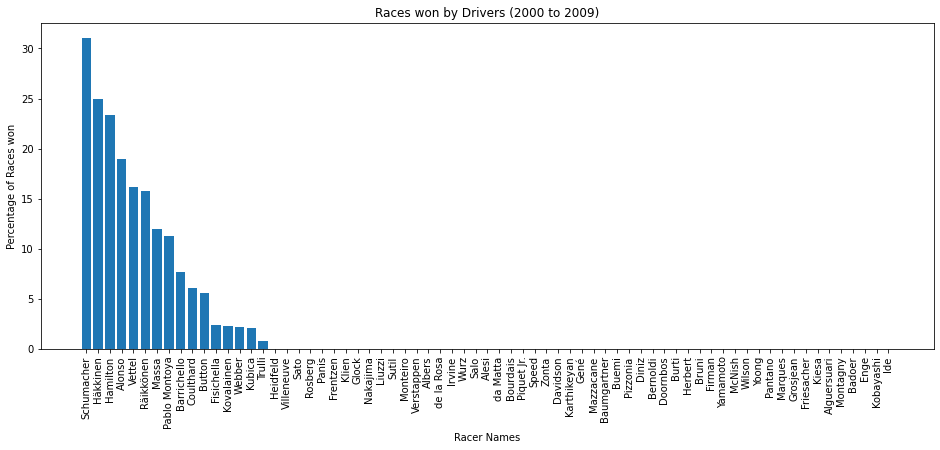

In [12]:
# Plot both axis
fig = plt.figure()
plt.figure(figsize=(16,6))
plt.bar(x_axis, y_axis)
plt.title('Races won by Drivers (2000 to 2009)')
plt.xlabel("Racer Names")
plt.ylabel("Percentage of Races won")
plt.xticks(rotation=90);

### 2010 to 2019

In [13]:
# filter data by years for all other than winners
dr_races = merged_df.loc[(merged_df['year']>=2010) & (merged_df['year']<2020) & (merged_df['position']!=0)]
dr_races_tot = dr_races.groupby(['surname'])['position'].count().sort_values(ascending=False)

In [14]:
# filter data by years for winners
driver_st = merged_df.loc[(merged_df['year']>=2010) & (merged_df['year']<2020) & (merged_df['position']==1)]
driver_st_wins = driver_st.groupby(['surname'])['position'].count().sort_values(ascending=False)

In [15]:
# transform data to get the percentage of wins by racer as a column
driver_stats_df = pd.merge(dr_races_tot, driver_st_wins, how='left', on='surname')
driver_stats_df = driver_stats_df.rename(columns={'position_x':'races','position_y':'wins'})
driver_stats_df['win_perc'] = ((driver_stats_df['wins'] / driver_stats_df['races']) * 100)
driver_stats_df = driver_stats_df.sort_values(ascending=False, by='win_perc')

In [16]:
#convert index to list for x-axis
x_axis = driver_stats_df.index.tolist()

In [17]:
#add column 'winner'
merged_df['winner'] = np.where(merged_df['position']==1, 1, 0)

In [18]:
# creating y-axis
y_axis = driver_stats_df.groupby(['surname'], sort=False)['win_perc'].sum().sort_values(ascending=False)

<Figure size 432x288 with 0 Axes>

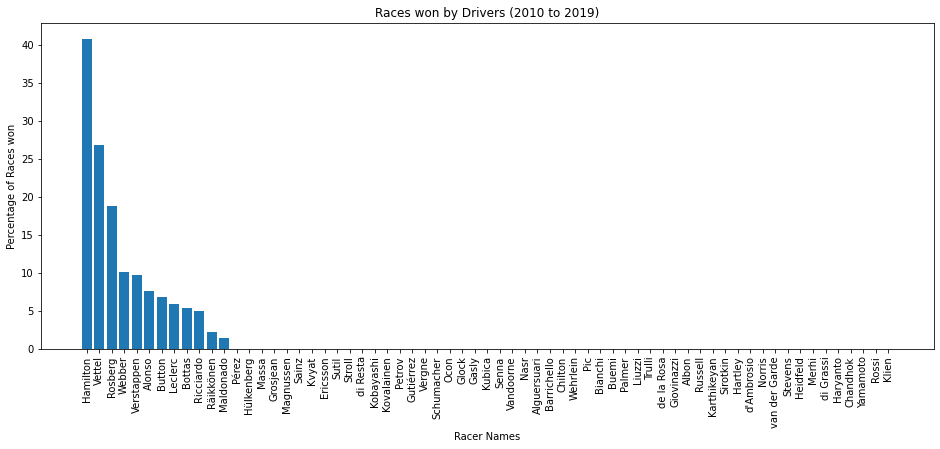

In [19]:
# Plot both axis
fig = plt.figure()
plt.figure(figsize=(16,6))
plt.bar(x_axis, y_axis)
plt.title('Races won by Drivers (2010 to 2019)')
plt.xlabel("Racer Names")
plt.ylabel("Percentage of Races won")
plt.xticks(rotation=90);

#### Conclusion: It is evident that for the last 20 years, only a select few raers are leading on the winners chart and this in-line with the analysis 1 and 2 where the winners are racers of the winning constuctors.